In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Problem Statement:
this project is to understand or predict the student mark based oon various feature like gender,ethinicity,parent level of education and so on

Reading the data from a CSV file


In [4]:
df = pd.read_csv(r'C:\mlproject\src\notebook\data\stud.csv')

In [5]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
843,male,group B,some college,free/reduced,completed,74,77,76
18,male,group C,master's degree,free/reduced,completed,46,42,46
245,male,group C,associate's degree,standard,none,85,76,71


Checking for any null values 

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Feature Information 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Statistical information about numerical data

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Categories of each feature

In [11]:
print(f"Categories in gender{df['gender'].unique()}")
print(f"Categories in race_ethnicity {df['race_ethnicity'].unique()}")
print(f"Categories in parental_level_of_education{df['parental_level_of_education'].unique()}")
print(f"Categories in lunch is{df['lunch'].unique()}")
print(f"Categories in test_preparation_course is {df['test_preparation_course'].unique()}")


Categories in gender['female' 'male']
Categories in race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch is['standard' 'free/reduced']
Categories in test_preparation_course is ['none' 'completed']


In [12]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']

In [13]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
536,male,group C,associate's degree,standard,completed,51,60,58,169
163,male,group C,high school,standard,none,52,53,49,154
530,female,group C,associate's degree,standard,completed,68,67,73,208


In [14]:
df['average'] = df['total_score']/3

In [15]:
df.sample(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
635,male,group A,high school,standard,none,71,74,64,209,69.666667
981,male,group D,some high school,standard,none,81,78,78,237,79.000000
654,female,group B,some high school,standard,none,73,79,79,231,77.000000


In [16]:
numerical_features =[feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']


In [17]:
print('we have {} numerical feature :{}'.format(len(numerical_features),numerical_features))
print('we have {} categirical feature :{}'.format(len(categorical_features),categorical_features))

we have 5 numerical feature :['math_score', 'reading_score', 'writing_score', 'total_score', 'average']
we have 5 categirical feature :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
reading_less_20 = df.query("`reading_score` <= 20")['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df.loc[df['math_score'] <=20,'average'].count()

In [ ]:
print(reading_less_20)
print(writing_less_20)
print(math_less_20)

In [19]:
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df.query(" `reading_score` == 100")['average'].count()
math_full = df.loc[df['math_score'] == 100,'average'].count()

In [20]:

print(writing_full)
print(reading_full)
print(math_full)

14
17
7


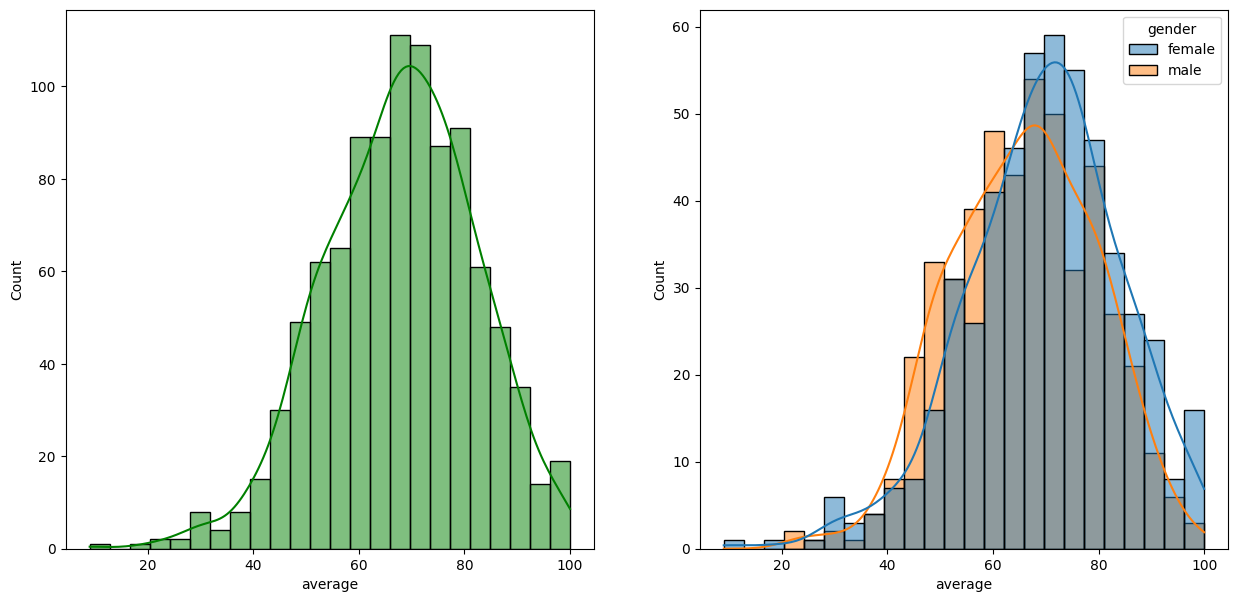

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data = df,x='average',color = 'green',kde = True)
plt.subplot(122)
sns.histplot(data = df ,x = 'average' , hue = 'gender',kde = True)
plt.show()

<Axes: xlabel='count', ylabel='gender'>

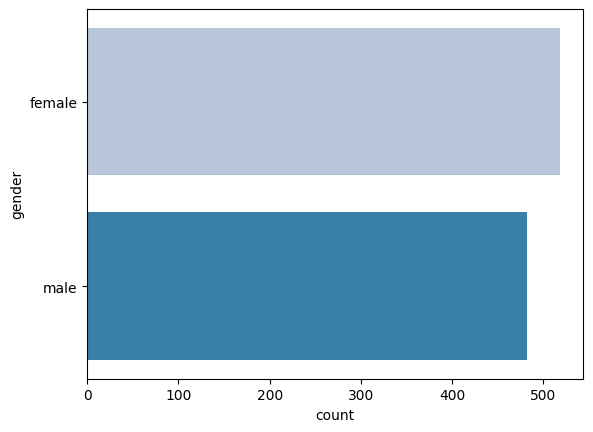

In [22]:

sns.countplot(df['gender'],palette = 'PuBu')


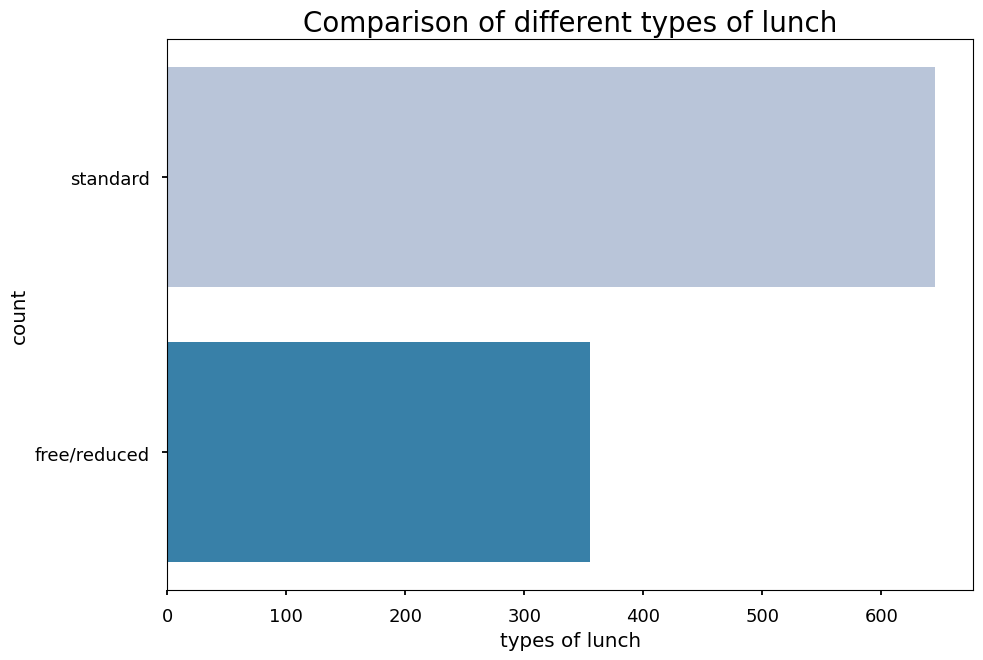

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()